Enter your mail: anya.antipina@gmail.com.  

{'mail': 'anya.antipina@gmail.com',  

 'id': 1395113663,  

 'type': 'regression',  

 'dataset': {'name': 'Diabetes Data Set',  

  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'},  
   
  'method': ['Линейная регрессия', 'SVR']}.

In [101]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Загрузка данных

In [97]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [98]:
dataset = load_diabetes()
X = dataset.data
Y = dataset.target
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X = np.vstack((X_train, X_test))
Y = np.hstack((Y_train, Y_test))
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

f = dataset.feature_names
columns_names = [*f, "Y"]
full_data = np.vstack((X.transpose(), Y)).transpose()
pandas.DataFrame(full_data, columns=columns_names).sample(5, random_state=0)
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

X shape: (442, 10)
Y shape: (442,)
X_train shape: (309, 10)
X_test shape: (133, 10)


age       sex       bmi        bp        s1        s2        s3  \
362  0.067136 -0.044642  0.036907 -0.050428 -0.023584 -0.034508  0.048640   
249 -0.060003  0.050680  0.015350 -0.019442  0.036958  0.048164  0.019187   
271 -0.074533 -0.044642  0.043373 -0.033214  0.012191  0.000252  0.063367   
435  0.045341 -0.044642 -0.006206  0.011544  0.063101  0.016222  0.096501   
400 -0.056370 -0.044642 -0.074108 -0.050428 -0.024960 -0.047034  0.092820   

           s4        s5        s6      Y  
362 -0.039493 -0.025952 -0.038357   90.0  
249 -0.002592 -0.030751 -0.001078   96.0  
271 -0.039493 -0.027129 -0.046641  103.0  
435 -0.039493  0.042896 -0.038357  134.0  
400 -0.076395 -0.061177 -0.046641   48.0

## Нормировка данных

In [99]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X = np.vstack((X_train, X_test))
Y = np.hstack((Y_train, Y_test))

full_data = np.vstack((X.transpose(), Y)).transpose()
pandas.DataFrame(full_data, columns=columns_names).sample(5, random_state=0)

age       sex       bmi        bp        s1        s2        s3  \
362  1.391990 -0.920447  0.882604 -1.029136 -0.547578 -0.773545  0.922051   
249 -1.275931  1.056616  0.285151 -0.434465  0.762373  0.966067  0.424375   
271 -1.584069 -0.946417  0.868077 -0.719244  0.255643 -0.004898  1.404494   
435  0.942634 -0.920447 -0.051815  0.334061  1.406491  0.402741  1.826834   
400 -1.154361 -0.920447 -1.523524 -1.029136 -0.578595 -1.063986  1.757235   

           s4        s5        s6      Y  
362 -0.887106 -0.684255 -0.784838   90.0  
249 -0.015547 -0.590740 -0.031854   96.0  
271 -0.806999 -0.515255 -0.990013  103.0  
435 -0.887106  0.809816 -0.784838  134.0  
400 -1.633943 -1.448654 -0.958955   48.0

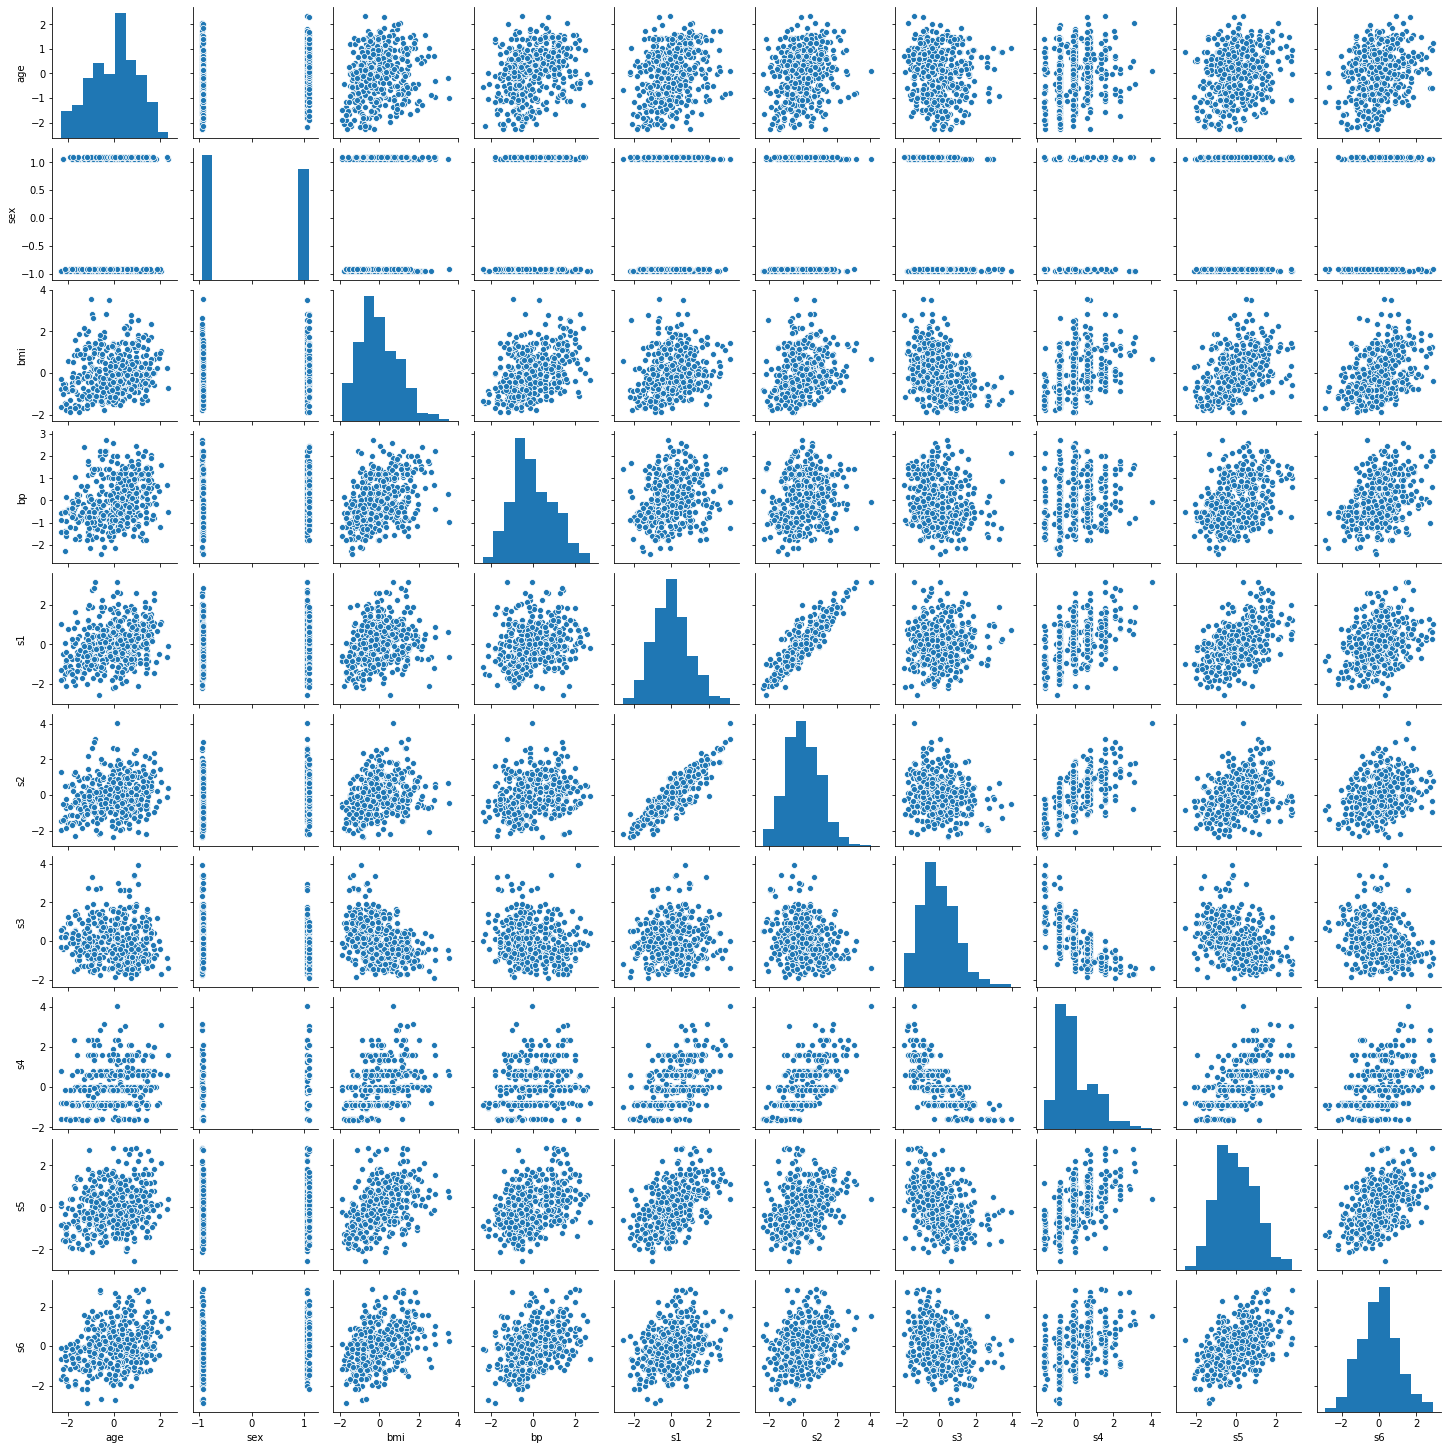

In [100]:
sns.pairplot(pandas.DataFrame(X, columns=dataset.feature_names), height=2)
plt.show()

## Линейная регрессия

In [102]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, Y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lin_reg.score(X_train, Y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lin_reg.score(X_test, Y_test)))

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print("Среднеквадратичная ошибка: {:.7f}".format(mean_squared_error(y_pred, Y_test)))


Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.50
Среднеквадратичная ошибка: 3080.2588971


### Промежуточный вывод 1
Можно видеть, что правильность даже на обучающем наборе очень низкая. Значит, случилось переобучение и сама модель не очень подходит для данного набора данных.  
Тогда возьмем модель, в которой используется регуляризация, и попробуем поварьировать параметром alpha и количесвом итераций.  

In [103]:
def run(Model, alphas, iters, X_train, Y_train, X_test, Y_test):
    res = []
    for alpha in alphas:
        res.append([])
        for iter in iters:
            model = Model(alpha=alpha, max_iter=iter)
            model.fit(X_train, Y_train)
            y_pred = model.predict(X_test)
            res[-1].append(mean_squared_error(y_pred, Y_test))
    return res

In [104]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

iters = [10,100,200,300,500,700, 900, 10000, 11000, 100000]
alphas = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
lasso_results_mse = run(Lasso, alphas, iters, X_train, Y_train, X_test, Y_test)
pandas.DataFrame(lasso_results_mse, index=alphas, columns=iters)

10           100          200          300          500     \
1.000000e-09  3132.960057  3091.961013  3082.518325  3080.707834  3080.276853   
1.000000e-08  3132.960057  3091.961015  3082.518327  3080.707837  3080.276855   
1.000000e-07  3132.960058  3091.961035  3082.518353  3080.707864  3080.276883   
1.000000e-06  3132.960061  3091.961236  3082.518616  3080.708138  3080.277159   
1.000000e-05  3132.960098  3091.963252  3082.521238  3080.710868  3080.279915   
1.000000e-04  3132.960462  3091.983414  3082.547468  3080.738180  3080.307480   
1.000000e-03  3132.964117  3092.185228  3082.810122  3081.011696  3080.583540   
1.000000e-02  3133.001721  3094.222927  3085.472513  3083.786569  3083.403159   
1.000000e-01  3133.782857  3116.490958  3115.835349  3115.835349  3115.835349   
1.000000e+00  3159.871447  3153.954746  3153.954746  3153.954746  3153.954746   
1.000000e+01  3455.200872  3455.200872  3455.200872  3455.200872  3455.200872   
1.000000e+02  6263.466184  6263.466184  6263.466184  6263.466184  6263.466184   

                   700          900          10000        11000        100000  
1.000000e-09  3080.259617  3080.258926  3080.258897  3080.258897  3080.258897  
1.000000e-08  3080.259619  3080.258929  3080.258900  3080.258900  3080.258900  
1.000000e-07  3080.259647  3080.258957  3080.258928  3080.258928  3080.258928  
1.000000e-06  3080.259923  3080.259232  3080.259207  3080.259207  3080.259207  
1.000000e-05  3080.262680  3080.261996  3080.261996  3080.261996  3080.261996  
1.000000e-04  3080.290255  3080.289885  3080.289885  3080.289885  3080.289885  
1.000000e-03  3080.569215  3080.569215  3080.569215  3080.569215  3080.569215  
1.000000e-02  3083.403159  3083.403159  3083.403159  3083.403159  3083.403159  
1.000000e-01  3115.835349  3115.835349  3115.835349  3115.835349  3115.835349  
1.000000e+00  3153.954746  3153.954746  3153.954746  3153.954746  3153.954746  
1.000000e+01  3455.200872  3455.200872  3455.200872  3455.200872  3455.200872  
1.000000e+02  6263.466184  6263.466184  6263.466184  6263.466184  6263.466184

In [105]:
lasso = Lasso(alpha=0.000000001, max_iter=10000)
lasso.fit(X_train, Y_train)
y_pred = lasso.predict(X_test)
print("Среднеквадратичная ошибка: {:.7f}".format(mean_squared_error(y_pred, Y_test)))
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, Y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, Y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Среднеквадратичная ошибка: 3080.2588974
Правильность на обучающем наборе: 0.52
Правильность на контрольном наборе: 0.50
Количество использованных признаков: 10


### Промежуточный вывод 2
Наилучший результат для L1 регуляризации был получен на (alpha=0.000000001, max_iter=10000), однако это не улучшило точность линейной регресии. Также можно видеть, что ни один из признаков не был обнулен данным методом.

## Метод опорных векторов для задачи регрессии

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

C = [1, 10, 100, 250, 500, 750, 1000] # параметр регуляризации
gamma = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6] # параметр нелинейных ядер

parameters = [{'kernel': ['linear'], 'C': C},
              {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': C, 'gamma': gamma}]

svr_model = GridSearchCV(SVR(), parameters, scoring='r2', n_jobs=6) # модель с подбором наилучших гиперпараметров

In [107]:
svr_model.fit(X_train, Y_train)
print(f"Best params: {svr_model.best_params_}")
print("Правильность на обучающем наборе: {:.2f}".format(svr_model.score(X_train, Y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(svr_model.score(X_test, Y_test)))
y_pred = svr_model.predict(X_test)
print("Среднеквадратичная ошибка: {:.7f}".format(mean_squared_error(Y_test, y_pred)))
pandas.DataFrame(svr_model.cv_results_)

Best params: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Правильность на обучающем наборе: 0.54
Правильность на контрольном наборе: 0.50
Среднеквадратичная ошибка: 3123.5669668


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.017857      0.014744         0.018942        0.018317       1   
1         0.023110      0.011419         0.001227        0.000226      10   
2         0.206927      0.137229         0.001172        0.000195     100   
3         0.235419      0.059755         0.004525        0.005867     250   
4         0.309614      0.064490         0.007150        0.007571     500   
..             ...           ...              ...             ...     ...   
107       0.013498      0.011735         0.004320        0.006193    1000   
108       0.018581      0.011454         0.004193        0.005219    1000   
109       0.014708      0.015245         0.016124        0.017763    1000   
110       0.022055      0.012755         0.002235        0.001670    1000   
111       0.011956      0.009035         0.001363        0.000221    1000   

    param_kernel param_gamma  \
0         linear         NaN   
1         linear         NaN   
2         linear         NaN   
3         linear         NaN   
4         linear         NaN   
..           ...         ...   
107         poly       1e-05   
108      sigmoid       1e-05   
109          rbf       1e-06   
110         poly       1e-06   
111      sigmoid       1e-06   

                                               params  split0_test_score  \
0                        {'C': 1, 'kernel': 'linear'}           0.466118   
1                       {'C': 10, 'kernel': 'linear'}           0.427371   
2                      {'C': 100, 'kernel': 'linear'}           0.426595   
3                      {'C': 250, 'kernel': 'linear'}           0.425201   
4                      {'C': 500, 'kernel': 'linear'}           0.421556   
..                                                ...                ...   
107     {'C': 1000, 'gamma': 1e-05, 'kernel': 'poly'}          -0.039870   
108  {'C': 1000, 'gamma': 1e-05, 'kernel': 'sigmoid'}           0.011663   
109      {'C': 1000, 'gamma': 1e-06, 'kernel': 'rbf'}          -0.026403   
110     {'C': 1000, 'gamma': 1e-06, 'kernel': 'poly'}          -0.039870   
111  {'C': 1000, 'gamma': 1e-06, 'kernel': 'sigmoid'}          -0.034086   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.423512           0.555169           0.499192   
1             0.414840           0.551198           0.540487   
2             0.399583           0.556847           0.541711   
3             0.398732           0.559490           0.541711   
4             0.396258           0.564949           0.541706   
..                 ...                ...                ...   
107          -0.074749          -0.023271          -0.024366   
108          -0.003820           0.051456           0.038724   
109          -0.068300          -0.010717          -0.012293   
110          -0.074749          -0.023271          -0.024366   
111          -0.071067          -0.016933          -0.016621   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.438875         0.476573        0.046978               11  
1             0.410106         0.468800        0.063248               17  
2             0.399516         0.464850        0.069804               20  
3             0.394620         0.463951        0.071744               21  
4             0.394618         0.463818        0.074072               22  
..                 ...              ...             ...              ...  
107          -0.018051        -0.036061        0.020669               98  
108           0.046726         0.028950        0.021404               47  
109          -0.000516        -0.023646        0.023802               57  
110          -0.018051        -0.036061        0.020669              105  
111          -0.008429        -0.029427        0.022435               62  

[112 rows x 16 columns]

## Выводы

В обоих рассмотренных методах модели показали низкую точность, что может объясняться свойствами самого датасета. Как можно заметить по визуализации данных, большинство признаков сгруппированны в эллипсоподобные проекции. Такие данные трудно оценить с высокой точностью гиперповерхностями, которые получаются заданными методами (для линейной регрессии и метода опорных векторов с линейным ядром гиперповерхностями будут гиперплоскости). Это можно было заметить по точности на обучающем наборе, которая почти не меняется вне зависимости от подбираемых гиперпараметров. По той же причине регуляризация для линейной регрессии не дала никаких улучшений, как было показано выше.  

В методе опорных векторов наибольшая точность как ни странно демострируется с ядром Гаусса. Но она остается примерно такой же, как и в линейной регресии.